In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sample_motion_normal(mu, sigma):
  return np.random.normal(mu, sigma)

In [4]:
#Arguments:
#x -- pose of the robot before moving [x, y, theta]
#u -- odometry reading obtained from the robot [rot1, rot2, trans]
#a -- noise parameters of the motion model [a1, a2, a3, a4]
def odometry_motion_model(x, u, a):
  delta_hat_r1 = u[0] + sample_motion_normal(0, a[0]*abs(u[0]) + a[1]*abs(u[2]))
  delta_hat_r2 = u[1] + sample_motion_normal(0, a[0]*abs(u[1]) + a[1]*abs(u[2]))
  delta_hat_t  = u[2] + sample_motion_normal(0, a[2]*abs(u[2]) + a[3]*(abs(u[0])+abs(u[1])))

  x_prime = x[0] + delta_hat_t * np.cos(x[2] + delta_hat_r1)
  y_prime = x[1] + delta_hat_t * np.sin(x[2] + delta_hat_r1)
  theta_prime = x[2] + delta_hat_r1 + delta_hat_r2

  return np.array([x_prime, y_prime, theta_prime])

In [30]:
def main():
  x = [2.0,4.0,0.0]
  u = [np.pi/2, 0.0,1.0]
  t = [0.1,0.1,0.01,0.01]

  num_samples = 5000
  x_prime = np.zeros([num_samples,3])
  for i in range(0,num_samples):
    x_prime[i,:] = odometry_motion_model(x,u,t)
    #print(x_prime[i,:])

  plt.plot(x[0],x[1], 'bo')
  plt.plot(x_prime[:,0], x_prime[:,1],'r,')
  plt.xlim([1,3])
  plt.axes().set_aspect('equal')
  plt.xlabel("x-position [m]")
  plt.ylabel("y-position [m]")
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


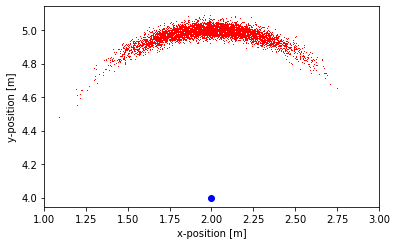

In [31]:
if __name__ == "__main__":
  main()